In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
from threadpoolctl import threadpool_limits

In [2]:
adata = sc.read_h5ad("results/fetalbatchsize256projection_dim32_1/concat.h5ad")
adata

AnnData object with n_obs × n_vars = 754268 × 32
    obs: 'atac:cell', 'atac:sample_name', 'atac:donor_id', 'atac:day_of_pregnancy', 'atac:sex', 'atac:tissue', 'atac:batch', 'atac:total', 'atac:total_deduplicated', 'atac:total_deduplicated_peaks', 'atac:total_deduplicated_tss', 'atac:frip', 'atac:frit', 'atac:x_chrom_window_counts', 'atac:y_chrom_window_counts', 'atac:autosome_window_counts', 'atac:blacklist_fraction', 'atac:seurat_clusters', 'atac:tissue_umap_1', 'atac:tissue_umap_2', 'atac:cell_type', 'rna:All_reads', 'rna:Assay', 'rna:Batch', 'rna:Development_day', 'rna:Exon_reads', 'rna:Experiment_batch', 'rna:Fetus_id', 'rna:Intron_reads', 'rna:Main_cluster_name', 'rna:Main_cluster_umap_1', 'rna:Main_cluster_umap_2', 'rna:Organ', 'rna:Organ_cell_lineage', 'rna:RT_group', 'rna:Sex', 'rna:Size_Factor', 'rna:batch', 'rna:sample', 'rna:cell_type', 'rna:ori_obs', 'cell_type', 'leiden', 'modality'
    uns: 'cell_type_colors', 'leiden', 'leiden_colors', 'modality_colors', 'neighbors', 'u

In [3]:
adata.obs['modality'] = adata.obs['modality'].cat.add_categories(['scRNA-seq', 'scATAC-seq'])
adata.obs.loc[adata.obs['modality'] == 'rna', "modality"] = "scRNA-seq"
adata.obs.loc[adata.obs['modality'] == 'atac', "modality"] = "scATAC-seq"
adata.obs['modality'] = adata.obs['modality'].cat.remove_categories(['rna', 'atac'])

In [4]:
with threadpool_limits(limits=20):
    # sc.pp.neighbors(adata, metric="cosine", use_rep="X", n_neighbors=30)
    sc.tl.umap(adata, min_dist=0.3, spread=1.0)
    # sc.tl.leiden(adata, resolution="", flavor="igraph", n_iterations=2)

In [5]:
adata.write("results/fetalbatchsize256projection_dim32_1/concat_mindist_3.h5ad")

In [2]:
adata = sc.read_h5ad("../results/fetalbatchsize256projection_dim32_1/concat_mindist_3.h5ad")

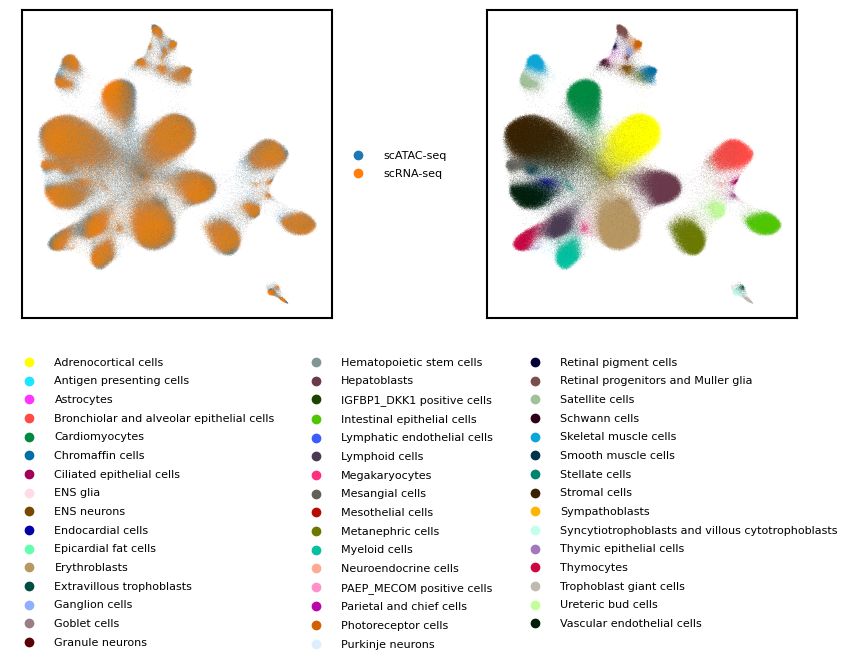

In [7]:
ncols, nrows, figsize, wspace = 2, 1, 4, 0.5
fig, axs = plt.subplots(
    nrows=nrows,
    ncols=ncols,
    figsize=(ncols * figsize + figsize * wspace * (ncols - 1), nrows * figsize),
)
plt.subplots_adjust(wspace=wspace)
sc.pl.umap(adata, color="modality", ax=axs[0], show=False, wspace=0.65, ncols=4)
sc.pl.umap(adata, color="cell_type", ax=axs[1], show=False, wspace=0.65, ncols=4)

axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].set_title("", fontsize=10)

axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].set_title("", fontsize=10)

# Add thick border
for spine in axs[0].spines.values():
    spine.set_edgecolor('black')  # Set border color
    spine.set_linewidth(1.5)  # Set border thickness
# Add thick border
for spine in axs[1].spines.values():
    spine.set_edgecolor('black')  # Set border color
    spine.set_linewidth(1.5)  # Set border thickness

legend1 = axs[0].get_legend()
for text in legend1.get_texts():
    text.set_fontsize(8)

legend2 = axs[1].get_legend()
legend2.set_bbox_to_anchor((-1.56, -0.6))
legend2.set_ncols(16)

for text in legend2.get_texts():
    text.set_fontsize(8)
fig.show()

In [9]:
fig.savefig("../results/fetalbatchsize256projection_dim32_1/fetal.png",
            bbox_inches='tight', dpi=1000, pad_inches=0, transparent=False
    )